# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [64]:
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep='\t')

In [70]:
top5 = chipo.groupby('item_name').sum().sort_values('quantity', ascending=False).head()
top5

,order_id,quantity
item_name,,
Chicken Bowl,713926,761
Chicken Burrito,497303,591
Chips and Guacamole,449959,506
Steak Burrito,328437,386
Canned Soft Drink,304753,351


### Step 4. See the first 10 entries

In [5]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

In [9]:
top_sold = chipo.groupby('item_name').quantity.sum().sort_values(ascending=False).head(5)

In [10]:
top_sold

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Canned Soft Drink      351
Name: quantity, dtype: int64

In [28]:
list(top_sold.index.values)

['Chicken Bowl',
 'Chicken Burrito',
 'Chips and Guacamole',
 'Steak Burrito',
 'Canned Soft Drink']

In [27]:
list(top_sold.values)

[761, 591, 506, 386, 351]

<AxesSubplot:xlabel='Item', ylabel='Total quantity'>

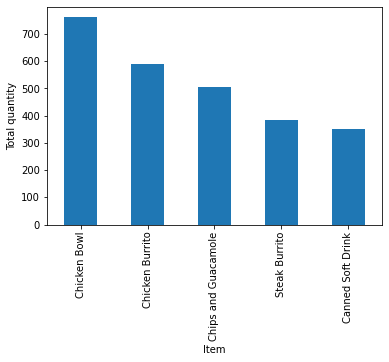

In [36]:
top_sold.plot(kind='bar', xlabel='Item', ylabel='Total quantity')

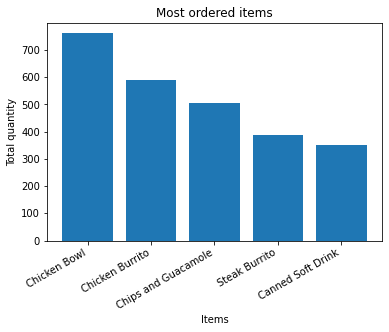

In [42]:
# plt.hist(top_sold.values, bins=top_sold.index)
plt.bar(x=list(top_sold.index.values), height=list(top_sold.values))
plt.xlabel("Items")
plt.ylabel("Total quantity")

plt.title("Most ordered items")
plt.xticks(rotation=30, ha='right')
plt.show()

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [43]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [50]:
# item price is an object, not a float
chipo.item_price.dtype

dtype('O')

In [51]:
f = lambda x : float(x.replace('$',''))
chipo.item_price=chipo['item_price'].apply(f)

In [52]:
# now it's a float
chipo.item_price.dtype

dtype('float64')

In [53]:
orders = chipo.groupby('order_id').agg(sum)

In [54]:
orders

,quantity,item_price
order_id,,
1,4,11.56
2,2,16.98
3,2,12.67
4,2,21.00
5,2,13.70
...,...,...
1830,2,23.00
1831,3,12.90
1832,2,13.20


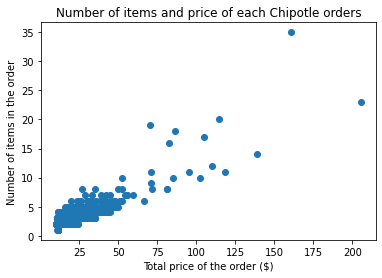

In [60]:
plt.scatter(orders.item_price, orders.quantity)

plt.xlabel("Total price of the order ($)")
plt.ylabel("Number of items in the order")
plt.title("Number of items and price of each Chipotle orders")
plt.show()

### Step 7. BONUS: Create a question and a graph to answer your own question.